In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("FraudDetection").getOrCreate()
# Initialize Spark session

In [7]:
raw_data = spark.read.csv("../data/creditcard.csv", header=True, inferSchema=True)
# Read the raw transaction data
if raw_data:
    print("contains data")
else:
    print("doesnot contain any data")

contains data


In [8]:
non_fraud_data = raw_data.filter(raw_data.Class == 0)
fraud_data = raw_data.filter(raw_data.Class == 1)

In [9]:
# since the difference between fraud and non fraud class is too big.
# we will try to equal the data
import pandas as pd
fraud_df = fraud_data.toPandas()
non_fraud_df = non_fraud_data.toPandas().head(492)
equalized_data = pd.concat([fraud_df, non_fraud_df])

In [12]:
'''
Lets start normalizating the data.
We are going to use sklearn MinMaxScalar because it provides a easy way to normalize it.
'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
equalized_data['Time'] = scaler.fit_transform(equalized_data['Time'].values.reshape(-1,1))
equalized_data['Amount'] = scaler.fit_transform(equalized_data['Amount'].values.reshape(-1,1))

In [16]:
# when there is a pandas dataframe, we use display.
# when its pyspark dataframe, we use df.show()
display(equalized_data) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995233,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-1.000000,1
1,-0.994458,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,-0.723618,1
2,-0.947613,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,-0.874646,1
3,-0.917980,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.969175,1
4,-0.911722,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.999478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.995809,-0.711928,1.547423,1.799759,2.489060,0.450497,1.073762,0.309374,0.450854,-1.560107,...,-0.115133,-0.136653,0.052595,-0.327937,-0.531480,0.005533,0.515896,0.250372,-0.999608,0
488,-0.995797,1.106251,0.398625,0.860421,2.388862,-0.365843,-0.192568,-0.121769,0.150876,-0.733271,...,-0.253189,-0.952836,0.181643,0.222462,0.083552,-0.342278,-0.017021,0.020976,-0.990894,0
489,-0.995797,-0.424666,0.554293,1.374234,-0.447451,0.288248,-1.082536,0.969035,-0.347446,-0.109678,...,-0.023296,0.103502,0.024513,0.425008,-0.227746,0.182264,0.076720,-0.098667,-0.978245,0
490,-0.995785,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.999326,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.176633,0.227863,-0.365219,0.441040,-0.103839,-0.283806,-0.241602,-0.067636,-0.356338,...,0.055621,0.118234,0.036447,-0.085778,-0.149954,0.022196,-0.059106,0.105158,0.106553,0.766175
V1,-0.176633,1.000000,-0.815273,0.885851,-0.618810,0.871065,0.331246,0.893485,-0.083201,0.667411,...,0.014938,-0.058945,-0.058465,-0.060129,-0.016738,0.055143,0.196408,0.186987,-0.046907,-0.426422
V2,0.227863,-0.815273,1.000000,-0.870190,0.684931,-0.810743,-0.308700,-0.857683,-0.023728,-0.718727,...,0.038856,0.004289,0.162755,-0.020148,0.054761,-0.011322,-0.163782,0.012342,-0.212187,0.478113
V3,-0.365219,0.885851,-0.870190,1.000000,-0.796294,0.852409,0.483934,0.895456,-0.175860,0.795067,...,0.018937,-0.075264,-0.033618,0.027183,-0.041491,-0.005142,0.096974,0.092987,-0.034515,-0.613963
V4,0.441040,-0.618810,0.684931,-0.796294,1.000000,-0.600360,-0.458256,-0.724185,0.113031,-0.818020,...,-0.027290,0.170322,0.033923,-0.078002,-0.090291,0.134909,-0.012749,-0.040933,0.032909,0.685672
V5,-0.103839,0.871065,-0.810743,0.852409,-0.600360,1.000000,0.325918,0.841820,-0.208157,0.678050,...,0.041268,-0.123783,-0.088696,-0.116307,-0.053489,0.037928,0.184453,0.149613,-0.115057,-0.378402
V6,-0.283806,0.331246,-0.308700,0.483934,-0.458256,0.325918,1.000000,0.316023,-0.557619,0.403167,...,0.015802,-0.024981,0.293952,-0.017682,-0.083498,-0.052112,-0.155945,-0.061031,0.171647,-0.457721
V7,-0.241602,0.893485,-0.857683,0.895456,-0.724185,0.841820,0.316023,1.000000,0.083513,0.786806,...,0.038496,-0.145077,-0.103701,-0.037817,0.089075,0.024934,0.236305,0.116872,0.103533,-0.484249
V8,-0.067636,-0.083201,-0.023728,-0.175860,0.113031,-0.208157,-0.557619,0.083513,1.000000,-0.084799,...,-0.116965,0.045279,-0.433348,0.065151,0.234962,0.045091,0.297871,0.005547,0.034383,0.063857
V9,-0.356338,0.667411,-0.718727,0.795067,-0.818020,0.678050,0.403167,0.786806,-0.084799,1.000000,...,0.162835,-0.273676,-0.064009,0.018974,0.068157,-0.114933,0.140779,0.096520,0.016888,-0.564955


<Axes: >

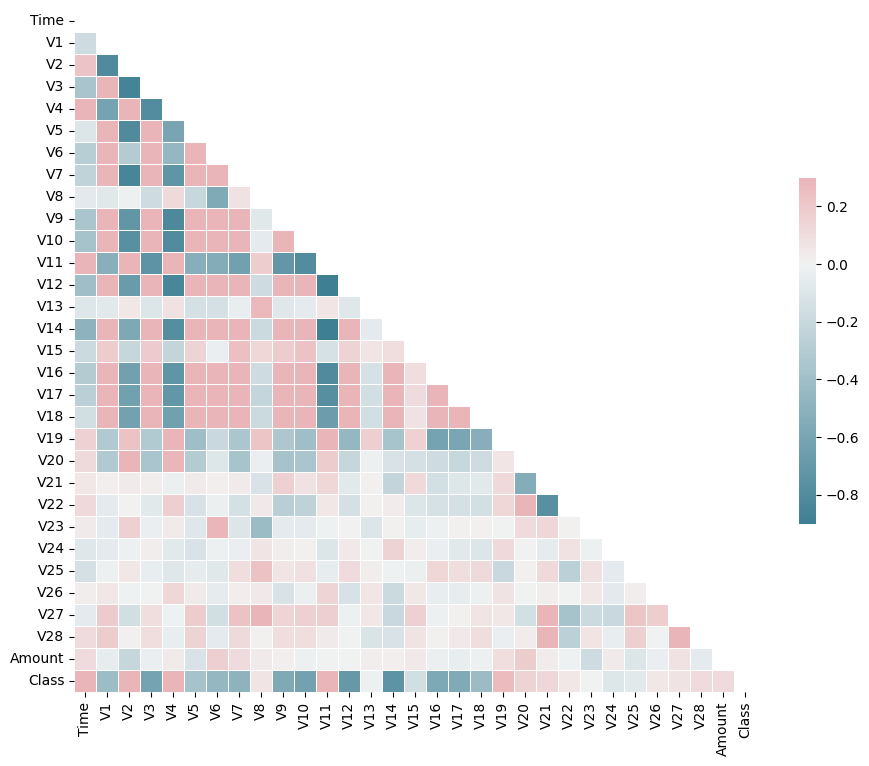

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# get the correlation data
correlation = equalized_data.corr()
display(correlation)
# creating a mask of matrix same as correlation 
mask = np.zeros_like(correlation, dtype=bool)
# hiding the redundant data from upper triangle
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})